# EDA

#### Analisis Exploratorio De los Datos Sobre los Siniestros Viales

### Indice:

1. [Introducción](#1--Introducción)
2. [Carga y exploración de datos](#2--Carga-y-exploración-de-datos)
3. [Estadistica Descriptiva](#3---estadistica-descriptiva)
4. [Vizualización de Variables Categoricas](#4---visualizacion-de-variables-categoricas)
5. [Reducción de Dimensionalidad](#5---reduccion-de-dimensionalidad)
6. [Tratamiento de Duplicados y OutLiers](#6--tratamiento-de-valores-atipicos-y-duplicados)
7. [Conclusiónes](#7--Conclusiones)

# 1- Introducción

- En este Notebook Explicaremos los cambios realizados a este DataSet tanto los tratamientos de los valores atipicos como los duplicados

- todo con la intención de tomar consiencia y acciones respecto a los Siniestros Viales que ocurren en Buenos Aires para poder evitar posibles victimas de estos hechos

- Nota:  estos cambios se realizaron en MySql En Este EDA solo se Explicara los cambios ya realizados

# 2- Carga y exploración de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


df_Hechos = pd.read_csv("Hechos.csv")
df_Victimas = pd.read_csv("Victimas.csv")
df_Hechos 

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1.0,2016-01-01 00:00:00,2016.0,1.0,1.0,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Dato Faltante,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1.0,2016-01-02 00:00:00,2016.0,1.0,2.0,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Dato Faltante,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9.0,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1.0,2016-01-03 00:00:00,2016.0,1.0,3.0,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,Dato Faltante,ENTRE RIOS AV. 2034,1.0,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1.0,2016-01-10 00:00:00,2016.0,1.0,10.0,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Dato Faltante,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8.0,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1.0,2016-01-21 00:00:00,2016.0,1.0,21.0,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Dato Faltante,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1.0,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,...,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante
713,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,...,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante
714,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,...,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante
715,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,...,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante


In [2]:
df_Victimas 

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01 00:00:00,2016.0,1.0,1.0,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02 00:00:00,2016.0,1.0,2.0,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03 00:00:00,2016.0,1.0,3.0,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10 00:00:00,2016.0,1.0,10.0,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21 00:00:00,2016.0,1.0,21.0,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,PEATON,Dato Faltante,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,PASAJERO_ACOMPAÑANTE,Dato Faltante,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,PASAJERO_ACOMPAÑANTE,Dato Faltante,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,Dato Faltante,Dato Faltante,Dato Faltante,Dato Faltante,CONDUCTOR,Dato Faltante,MASCULINO,27,2022-01-02 00:00:00


# 3 - Estadistica Descriptiva
##### Se realiza las estadisticas descriptivas de las variables numericas en busca de valores atipicos

In [3]:
df_Victimas["EDAD"].describe()

count     717
unique     86
top        SD
freq       53
Name: EDAD, dtype: object

In [4]:
df_Hechos["N_VICTIMAS"].describe()

count     717
unique      4
top       1.0
freq      676
Name: N_VICTIMAS, dtype: object

# 4 - Visualizacion de Variables Categoricas

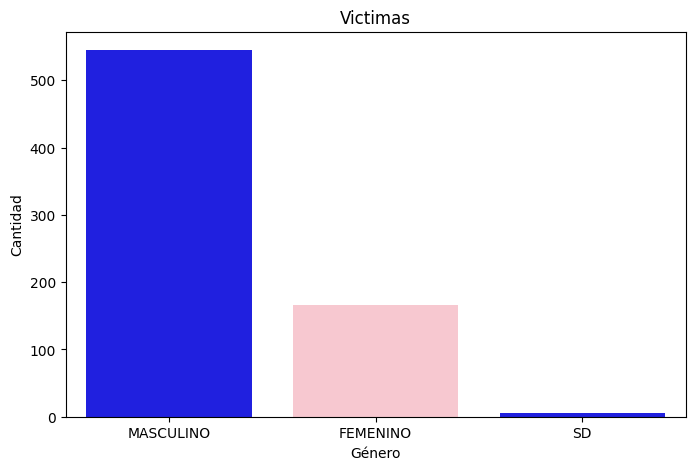

In [5]:
genero_counts = df_Victimas['SEXO'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=genero_counts.index, y=genero_counts.values, palette=['blue', 'pink'])
plt.title('Victimas')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()


##### En este Grafico se puede observar que la mayor cantidad de Victimas son de Genero Masculino

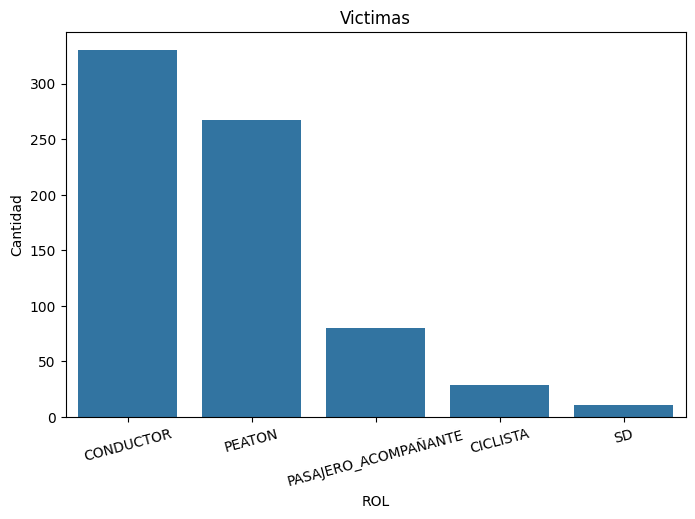

In [6]:
rol_counts = df_Victimas['ROL'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=rol_counts.index, y=rol_counts.values)
plt.title('Victimas')
plt.xlabel('ROL')
plt.ylabel('Cantidad')
plt.xticks(rotation=15)
plt.show()

##### Tambien podemos observar que la mayor cantidad de victimas que sufren estos accidentes son Conductores

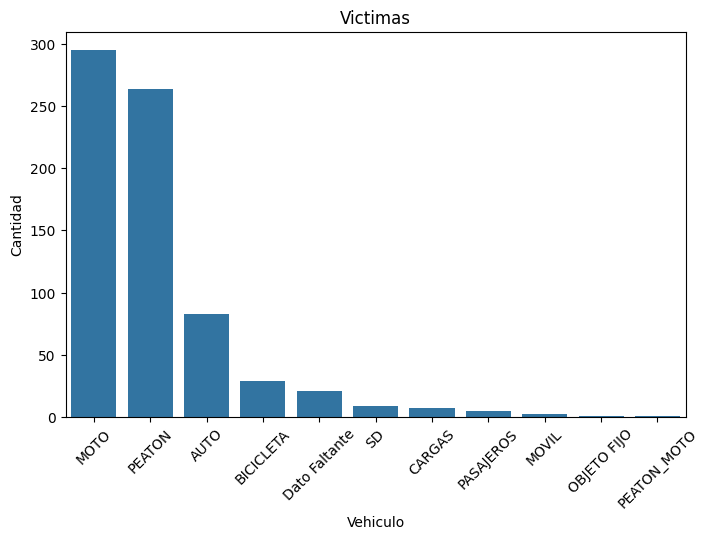

In [7]:
victima_counts = df_Hechos['VICTIMA'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=victima_counts.index, y=victima_counts.values)
plt.title('Victimas')
plt.xlabel('Vehiculo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

##### Y por ultimo el Vehiculo mas recurrente a estos Accidentes son las Motos

# 5 - Reduccion de Dimensionalidad

### Criterios de eliminación:

- Los Valores de la variable se pueden encontrar en otra columna
- Evitar redundancia en los datos

### Variables a Eliminar del DataFrame "Hechos":

- Dirección Normalizada (Se decide usar "LUGAR_DEL_HECHO" por tener menor cantidad de nulos)
- TIPO_DE_CALLE
- Calle
- Altura
- Cruce
- XY (CABA)
- HH

# 6- Tratamiento de Valores Atipicos y duplicados

#### Una Vez visto el DataFrame se Decide Realizar Normalización en los Valores atipicos de la columna "HORA" Teniamos Valores Negativos y Mal escritos, y En la Columna "ID" se decide cambiar los valores porque habia ID´S Duplicados donde el caso era diferente a pesar de ser el mismo ID y por ultimo en todas las filas donde teniamos Datos Faltantes o Nulos se decidio poner "Dato Faltante" a cada unos de esos campos

# 7- Conclusiones

- Nuestras variables categoricas mas importantes a usar son "SEXO","ROL" y "VICTIMA" 


- La columna "HORA" tenia datos atipicos que fueron normalizados


- Se optara por usar el Dataset ya corregido para los graficos correspondientes